# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/LucaPennella/Intro_to_ML_23-24/blob/main/challenges/challenge_two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

In [2]:
# create training dataset
train_points = 2000
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 1000

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Let's shuffle the train set to avoid potential grouping
X_train, y_train = shuffle(X_train, y_train, random_state=0)

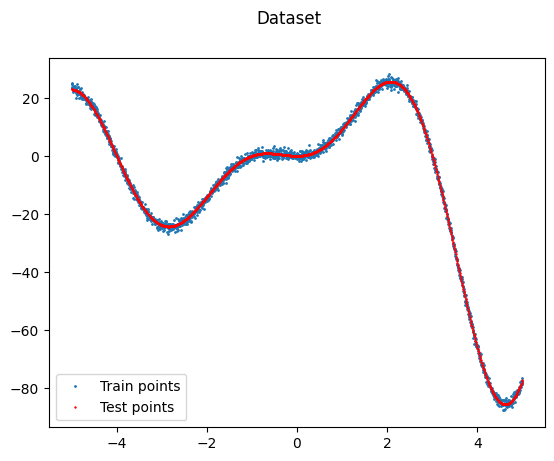

In [3]:
fig, ax = plt.subplots()
ax.plot(X_train, y_train, 'o', label='Train points', markersize=1)
ax.plot(X_test, y_test, '+', c='red', label='Test points', markersize=1)
fig.suptitle('Dataset')
plt.legend()

RMSE Linear Ridge regression:  26.754470926631164


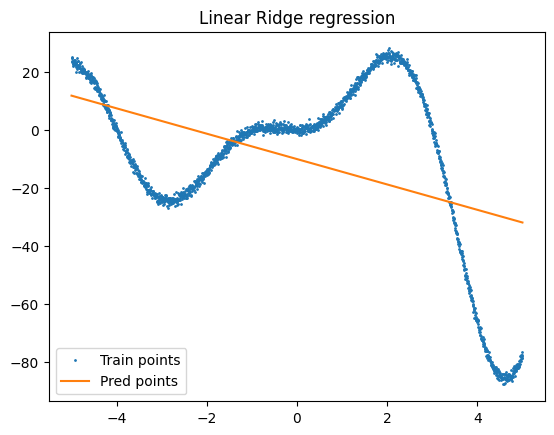

In [4]:
lrr = Ridge(alpha=1, random_state=0).fit(X_train, y_train)

y_pred = lrr.predict(X_test)

fig, ax = plt.subplots()
ax.set_title('Linear Ridge regression')
ax.plot(X_train, y_train, 'o', label='Train points', markersize=1)
ax.plot(X_test, y_pred, label='Pred points')
plt.legend()
fig.show()\

print('RMSE Linear Ridge regression: ', mean_squared_error(y_test, y_pred)**(1/2))

Gaussian Ridge regression

In [5]:
gaussian_kernel = KernelRidge(kernel='rbf')
params = {
    'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30],
    'gamma' : [1e-3,1e-2,0.1,1,1.5,3,10]
}

gauss_krr = GridSearchCV(estimator=gaussian_kernel, param_grid=params, scoring='neg_mean_squared_error', refit='neg_mean_squared_error', return_train_score=True, cv=5)
gauss_krr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KernelRidge(kernel='rbf'),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30],
                         'gamma': [0.001, 0.01, 0.1, 1, 1.5, 3, 10]},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring='neg_mean_squared_error')

In [6]:
gauss_krr_results = pd.DataFrame(gauss_krr.cv_results_)
gauss_krr_results.sort_values(by='rank_test_score')[['mean_test_score','std_test_score', 'mean_train_score', 'std_train_score', 'params']].head()

,mean_test_score,std_test_score,mean_train_score,std_train_score,params
9,-0.959184,0.037159,-0.940809,0.009233,"{'alpha': 1e-10, 'gamma': 0.1}"
16,-0.959868,0.040861,-0.943567,0.009712,"{'alpha': 1e-08, 'gamma': 0.1}"
24,-0.961226,0.038235,-0.933962,0.009063,"{'alpha': 0.001, 'gamma': 1}"
32,-0.962676,0.037534,-0.933937,0.009003,"{'alpha': 0.01, 'gamma': 1.5}"
31,-0.962865,0.039323,-0.938715,0.009516,"{'alpha': 0.01, 'gamma': 1}"


KernelRidge(alpha=1e-10, gamma=0.1, kernel='rbf')
RMSE Gaussian kernel Ridge regression:  0.11839761239636981


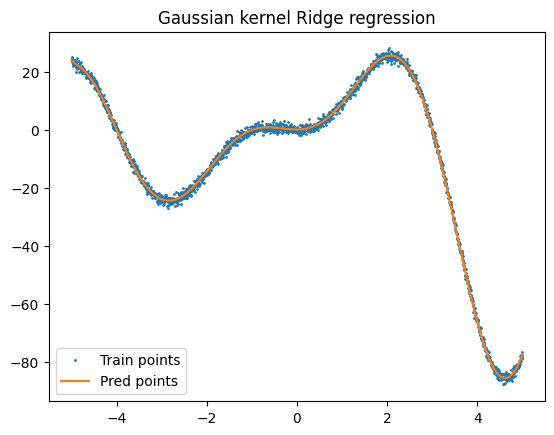

In [7]:
best_gauss_krr = gauss_krr.best_estimator_
y_pred = best_gauss_krr.predict(X_test)
mse_gauss_krr = mean_squared_error(y_test, y_pred)

fig, ax = plt.subplots()
ax.set_title('Gaussian kernel Ridge regression')
ax.plot(X_train, y_train, 'o', label='Train points', markersize=1)
ax.plot(X_test, y_pred, label='Pred points')
plt.legend()
fig.show()

print(best_gauss_krr)
print('RMSE Gaussian kernel Ridge regression: ', mse_gauss_krr**(1/2))

Polynomial Ridge regression

In [8]:
poly_kernel = KernelRidge(kernel='poly')
params = {
    'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30],
    'gamma' : [0.1],
    'degree' : [7,8,9,10,11,12,13]
}

poly_krr = GridSearchCV(estimator=poly_kernel, param_grid=params, scoring='neg_mean_squared_error', refit='neg_mean_squared_error', return_train_score=True, cv=5)
poly_krr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KernelRidge(kernel='poly'),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30],
                         'degree': [7, 8, 9, 10, 11, 12, 13], 'gamma': [0.1]},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring='neg_mean_squared_error')

In [9]:
poly_krr_results = pd.DataFrame(poly_krr.cv_results_)
poly_krr_results.sort_values(by='rank_test_score')[['mean_test_score','std_test_score', 'mean_train_score', 'std_train_score', 'params']].head()

,mean_test_score,std_test_score,mean_train_score,std_train_score,params
27,-0.957988,0.041291,-0.943168,0.010025,"{'alpha': 0.001, 'degree': 13, 'gamma': 0.1}"
34,-0.957989,0.041219,-0.943172,0.010025,"{'alpha': 0.01, 'degree': 13, 'gamma': 0.1}"
20,-0.960231,0.038244,-0.948778,0.014357,"{'alpha': 1e-08, 'degree': 13, 'gamma': 0.1}"
6,-0.963008,0.040404,-0.946993,0.010619,"{'alpha': 1e-15, 'degree': 13, 'gamma': 0.1}"
19,-0.963033,0.040769,-0.952583,0.007728,"{'alpha': 1e-08, 'degree': 12, 'gamma': 0.1}"


KernelRidge(alpha=0.001, degree=13, gamma=0.1, kernel='poly')
RMSE Polynomial kernel Ridge regression:  0.11181892491134075


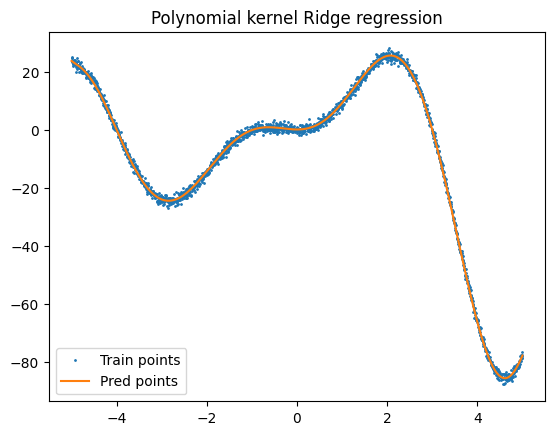

In [10]:
best_poly_krr = poly_krr.best_estimator_
y_pred = best_poly_krr.predict(X_test)
mse_poly_krr = mean_squared_error(y_test, y_pred)

fig, ax = plt.subplots()
ax.set_title('Polynomial kernel Ridge regression')
ax.plot(X_train, y_train, 'o', label='Train points', markersize=1)
ax.plot(X_test, y_pred, label='Pred points')
plt.legend()
fig.show()

print(best_poly_krr)
print('RMSE Polynomial kernel Ridge regression: ', mse_poly_krr**(1/2))

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.svm import LinearSVC
import math

np.random.seed(0)

In [12]:
X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

y_train = y_train.reshape(-1, 1)

In [13]:
X_train
len(y_test)

250

*No need to scale the set*

In [14]:
y_train

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

*No need to shuffle the labels*

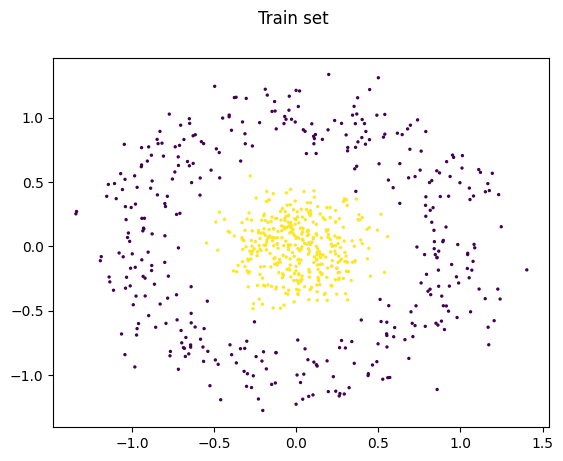

In [15]:
fig, ax = plt.subplots()
fig.suptitle('Train set')
ax.scatter(X_train[:, 0], X_train[:, 1], s=2, c=y_train)

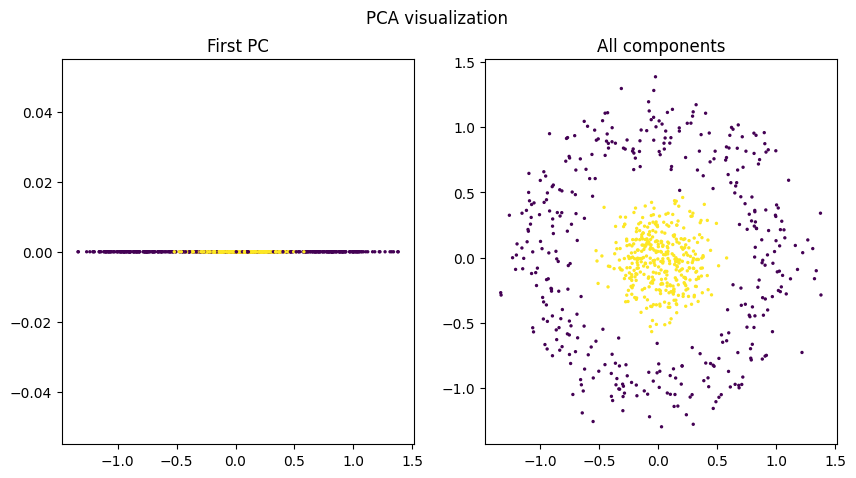

In [16]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('PCA visualization')

# Plotting the representations of the dataset using the first Principal Component
pca = PCA(1)
pca.fit(X_train)
train_projection_1D = pca.transform(X_train)

ax = fig.add_subplot(1, 2, 1)
ax.scatter(train_projection_1D[:, 0], np.zeros_like(train_projection_1D), s=2, c=y_train)
ax.set_title('First PC')

# Plotting the representations of the dataset using the all the components
pca = PCA(2)
pca.fit(X_train)
train_projection = pca.transform(X_train)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(train_projection[:, 0], train_projection[:, 1], s=2, c=y_train)
ax.set_title('All components')

plt.show()

In this case PCA alone cannot help us classify the two clusters, since there's no apparent line that is able to separate the two groups. 

Let's see what Gaussian kernel PCA would do.

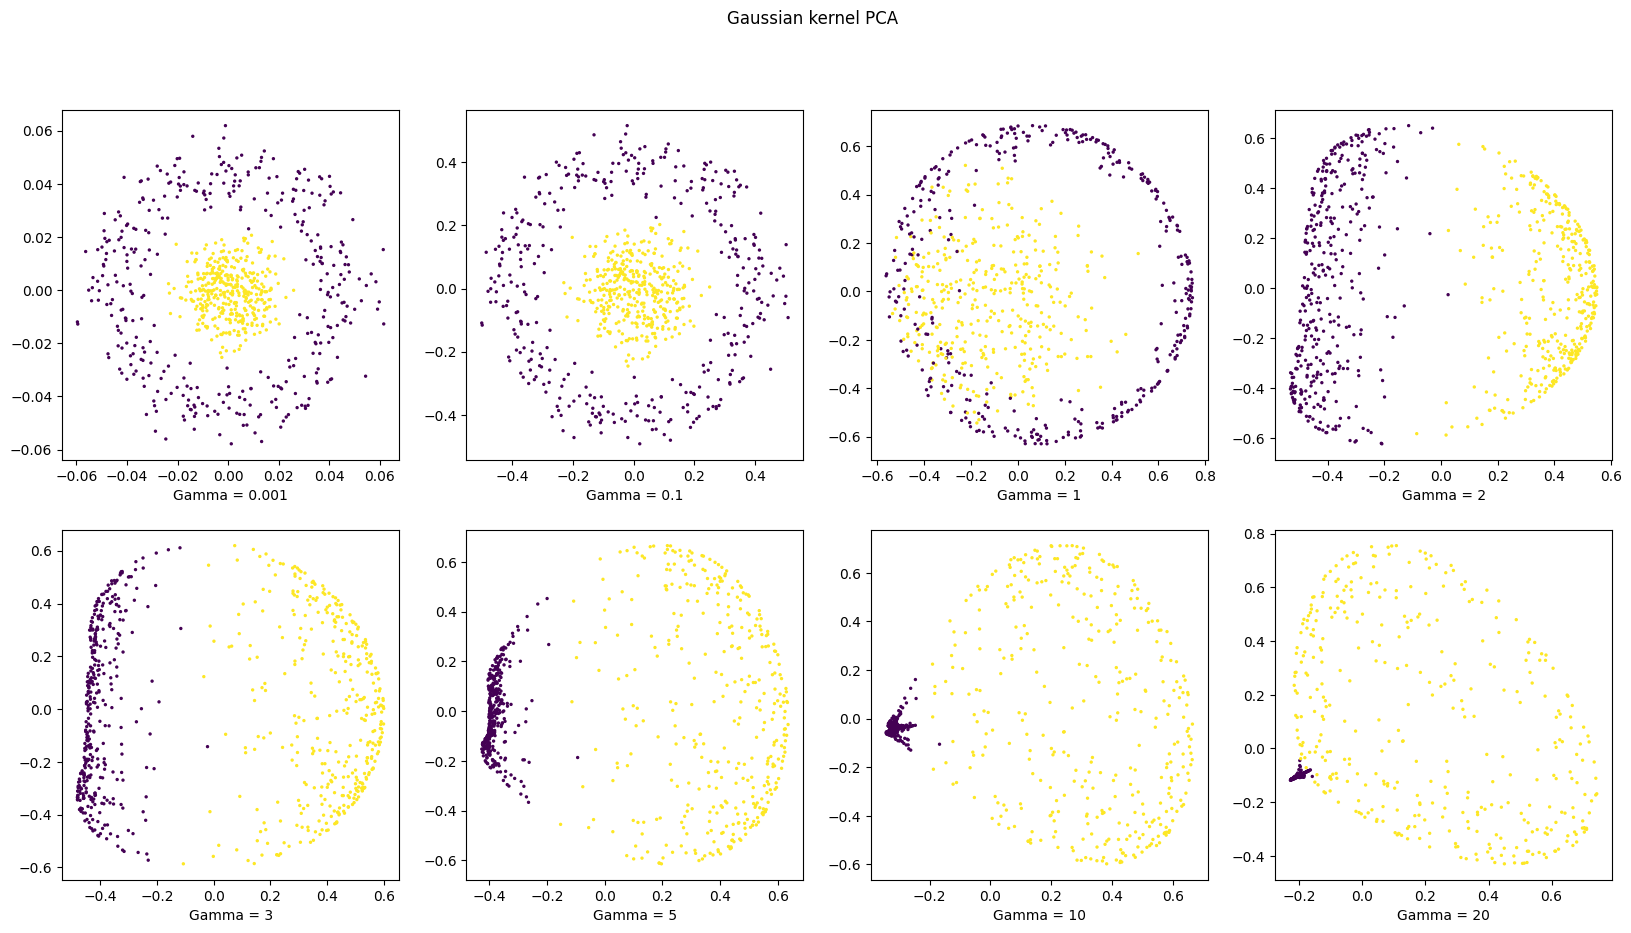

In [17]:
gamma_list = [1e-3, 0.1, 1, 2, 3, 5, 10, 20]

fig, ax = plt.subplots(2,4, figsize=(20,10))
fig.suptitle('Gaussian kernel PCA')

for index, gamma in enumerate(gamma_list):
    k_pca = KernelPCA(2, kernel='rbf', gamma=gamma)
    k_pca.fit(X_train)
    k_projection = k_pca.transform(X_train)

    row = math.floor(index/4)
    col = index % 4
    ax[row, col].scatter(k_projection[:, 0], k_projection[:, 1], s=2, c=y_train)
    ax[row,col].set_xlabel(f'Gamma = {gamma}')

plt.show()

In [18]:
# We choose gamma = 3
pca = PCA(2)
k_pca = KernelPCA(2, kernel='rbf', gamma=3)

train_projection = pca.fit_transform(X_train)
train_k_projection = k_pca.fit_transform(X_train)

test_projection = pca.transform(X_test)
test_k_projection = k_pca.transform(X_test)

In [19]:
svm = LinearSVC().fit(train_projection, y_train)
w0, w1 = svm.coef_[0]
b = svm.intercept_[0]
accuracy = svm.score(test_projection, y_test)

k_svm = LinearSVC().fit(train_k_projection, y_train)
k_w0, k_w1 = k_svm.coef_[0]
k_b = k_svm.intercept_[0]
k_accuracy = k_svm.score(test_k_projection, y_test)

Accuracy: 0.496
Accuracy with gaussian kernel: 0.992


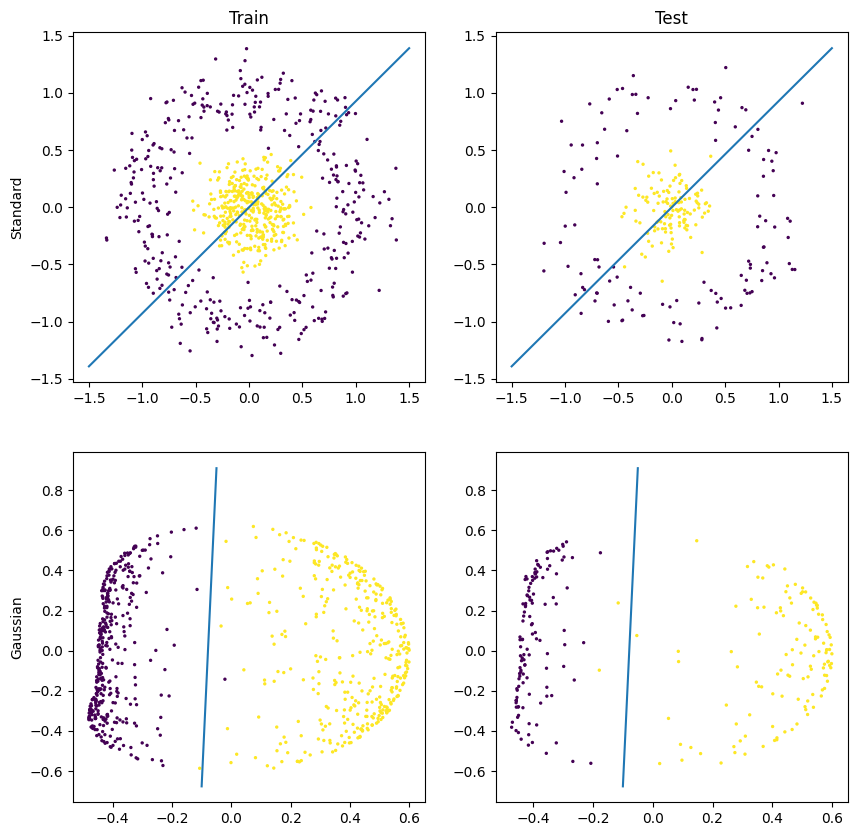

In [20]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

# separator Xs
x = np.linspace(-1.5,1.5,1000).reshape(-1,1)
k_x = np.linspace(-0.1,-0.05,1000).reshape(-1,1)

ax[0,0].scatter(train_projection[:, 0], train_projection[:, 1], s=2, c=y_train)
ax[0,0].plot(x, -(w0/w1)*x - (b/w1))
ax[0,0].set_title('Train')
ax[0,0].set_ylabel('Standard')

ax[0,1].scatter(test_projection[:, 0], test_projection[:, 1], s=2, c=y_test)
ax[0,1].plot(x, -(w0/w1)*x - (b/w1))
ax[0,1].set_title('Test')


ax[1,0].scatter(train_k_projection[:, 0], train_k_projection[:, 1], s=2, c=y_train)
ax[1,0].plot(k_x, -(k_w0/k_w1)*k_x - (k_b/k_w1))
ax[1,0].set_ylabel('Gaussian')

ax[1,1].scatter(test_k_projection[:, 0], test_k_projection[:, 1], s=2, c=y_test)
ax[1,1].plot(k_x, -(k_w0/k_w1)*k_x - (k_b/k_w1))

print(f'Accuracy: {accuracy}') 
print(f'Accuracy with gaussian kernel: {k_accuracy}') 

## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.svm import LinearSVC
import math

np.random.seed(0)

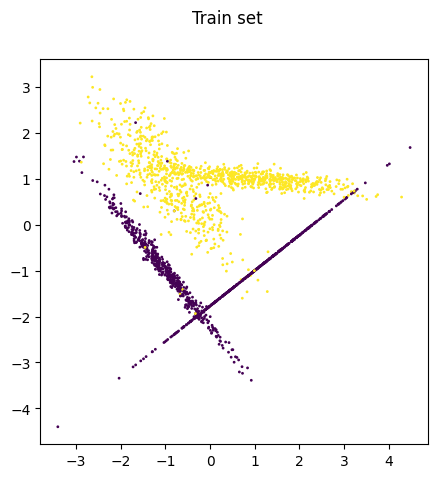

In [22]:
X, y = make_classification(n_samples=3000, n_features=2, n_redundant=0, n_classes=2, random_state=0, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, shuffle=True)

fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Train set')
ax.scatter(X_train[:, 0], X_train[:, 1], s=1, c=y_train)

In [23]:
X_train

array([[-1.73711812, -0.21964405],
       [-1.4188124 , -0.54100524],
       [-1.46512462,  0.86598321],
       ...,
       [-1.21138554, -0.75699989],
       [ 1.62287634,  0.92559075],
       [ 0.70993496, -1.22408256]])

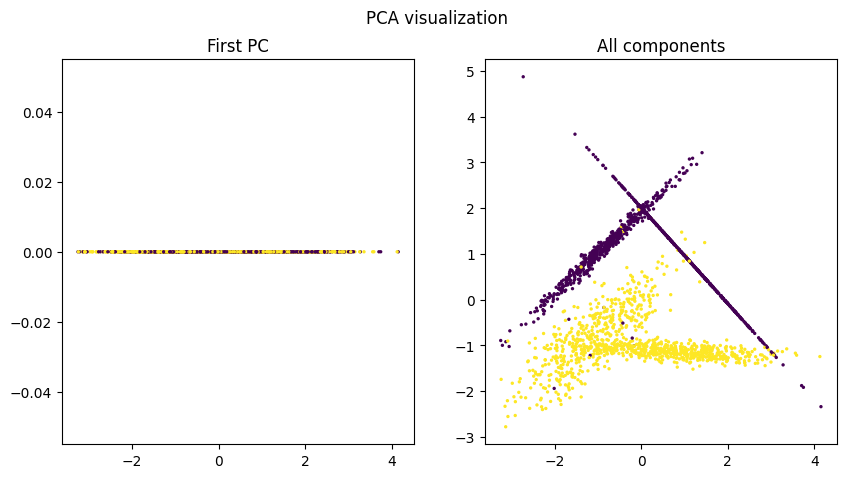

In [24]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('PCA visualization')

# Plotting the representation of the dataset using the first PC
pca = PCA(1)
pca.fit(X_train)
train_projection = pca.transform(X_train)

ax = fig.add_subplot(1, 2, 1)
ax.scatter(train_projection[:, 0], np.zeros_like(train_projection[:, 0]), s=2, c=y_train)
ax.set_title('First PC')

# Plotting the representation of the dataset using all the components
pca = PCA(2)
pca.fit(X_train)
train_projection = pca.transform(X_train)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(train_projection[:, 0], train_projection[:, 1], s=2, c=y_train)
ax.set_title('All components')

plt.show()

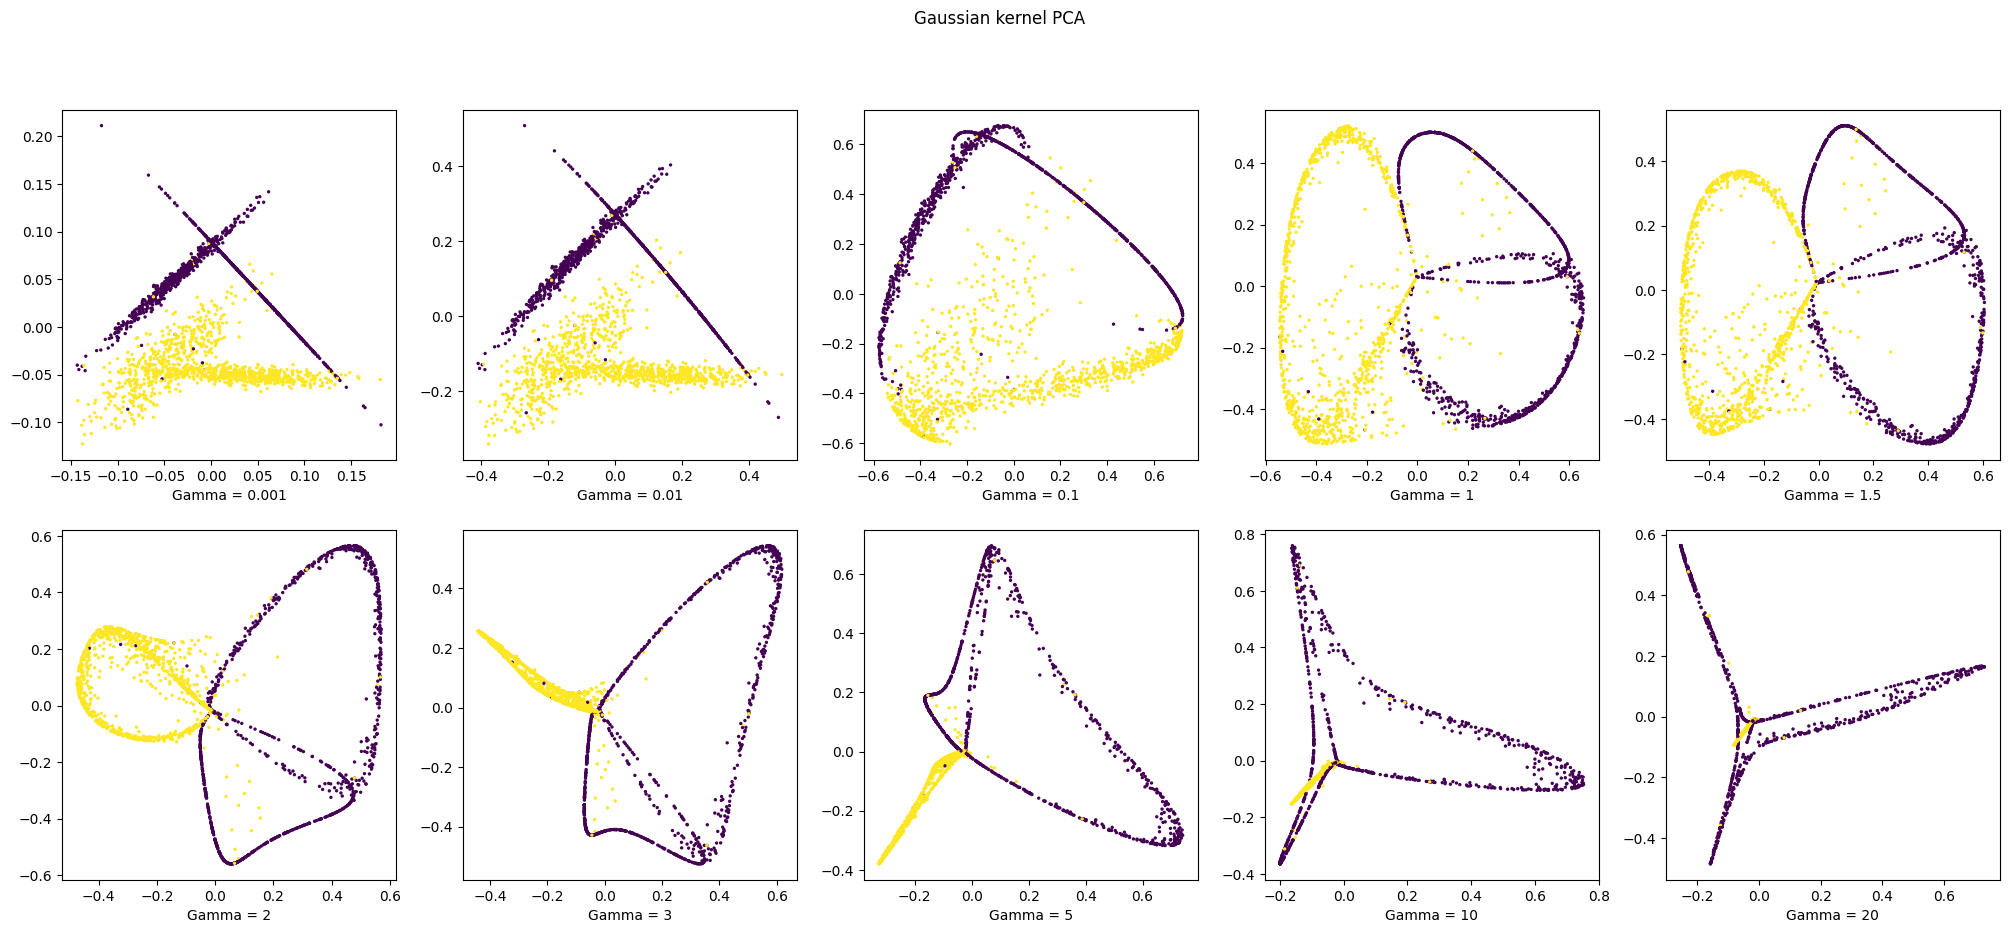

In [25]:
# GAUSSIAN
gamma_list = [1e-3, 1e-2, 0.1, 1, 1.5, 2, 3, 5, 10, 20]\

fig, ax = plt.subplots(2,5, figsize=(25,10))
fig.suptitle('Gaussian kernel PCA')

for index, gamma in enumerate(gamma_list):
    k_pca = KernelPCA(2, kernel='rbf', gamma=gamma)
    k_pca.fit(X_train)
    k_projection = k_pca.transform(X_train)

    row = math.floor(index/5)
    col = index % 5
    ax[row, col].scatter(k_projection[:, 0], k_projection[:, 1], s=2, c=y_train)
    ax[row,col].set_xlabel(f'Gamma = {gamma}')

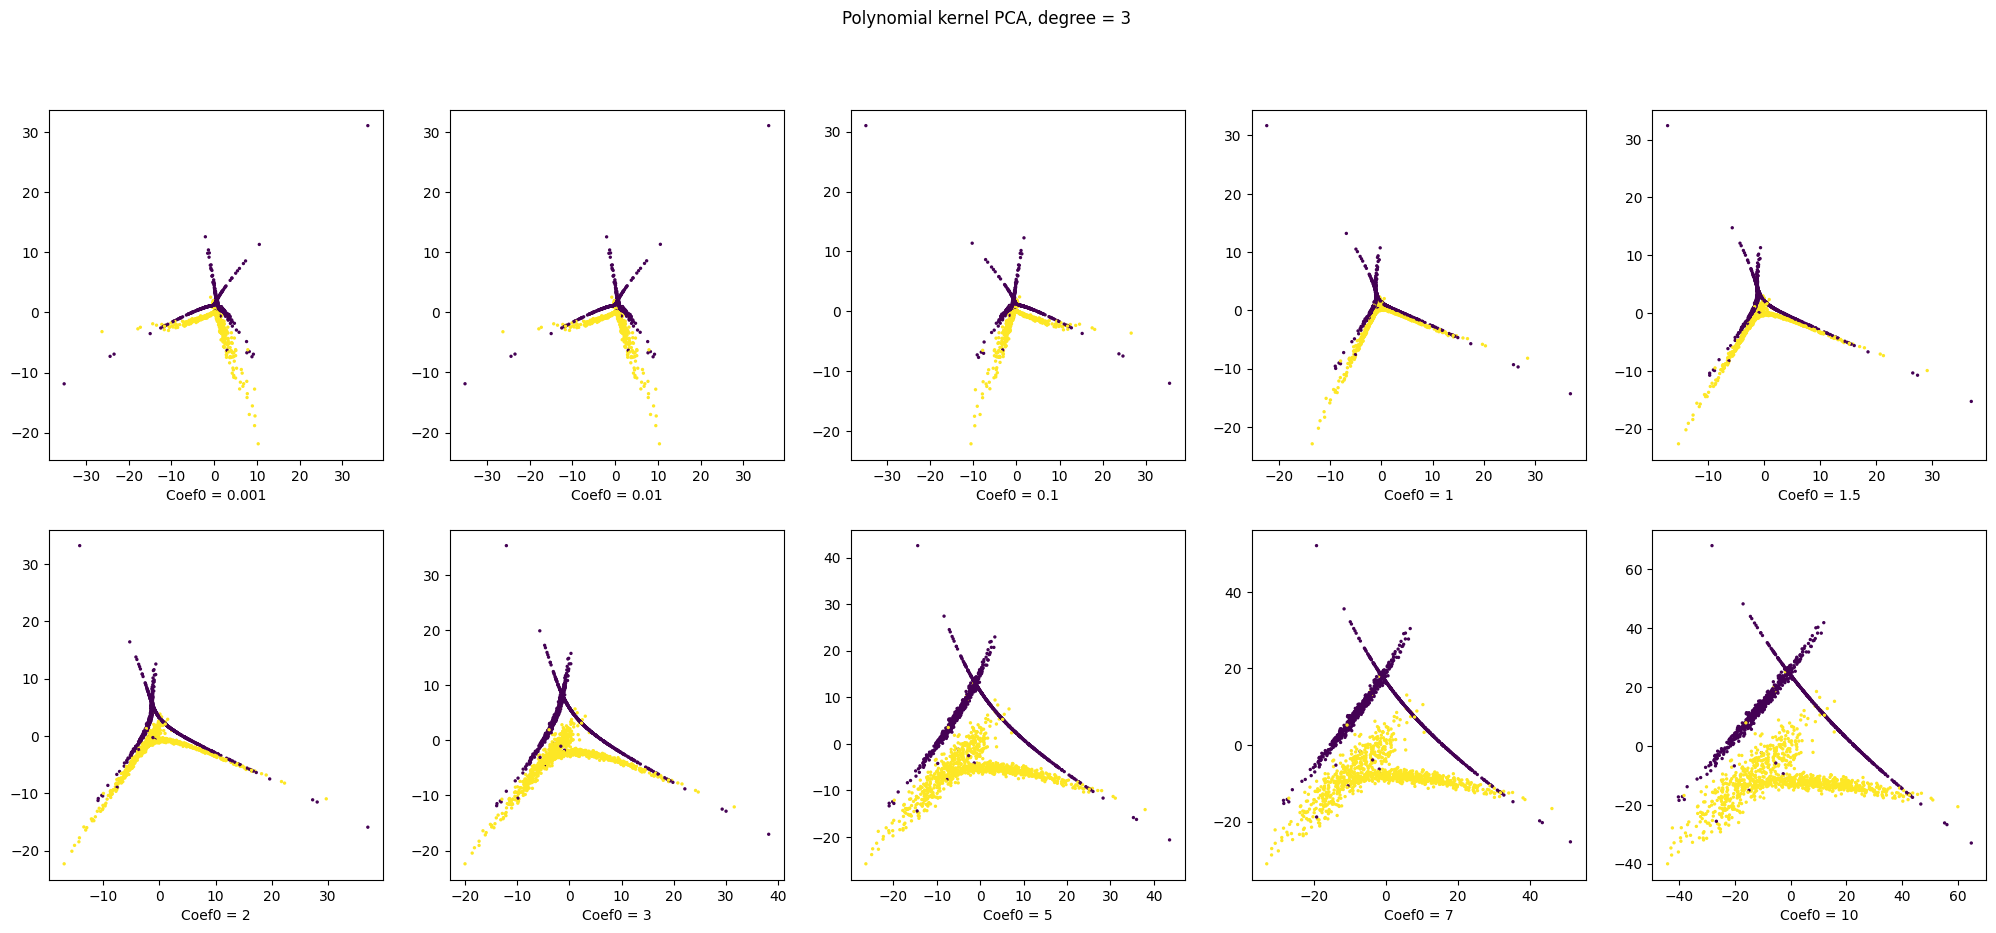

In [26]:
# POLYNOMIAL
coef0_list = [1e-3, 1e-2, 0.1, 1, 1.5, 2, 3, 5, 7, 10]

fig, ax = plt.subplots(2,5, figsize=(25,10))
fig.suptitle('Polynomial kernel PCA, degree = 3')

for index, coef0 in enumerate(coef0_list):
    k_pca = KernelPCA(2, kernel='poly', coef0=coef0, degree=3)
    k_pca.fit(X_train)
    k_projection = k_pca.transform(X_train)

    row = math.floor(index/5)
    col = index % 5
    ax[row, col].scatter(k_projection[:, 0], k_projection[:, 1], s=2, c=y_train)
    ax[row,col].set_xlabel(f'Coef0 = {coef0}')

In [27]:
pca = PCA(2)
gamma=2; coef0=7
gauss_pca = KernelPCA(2, kernel='rbf', gamma=gamma)
poly_pca = KernelPCA(2, kernel='poly', coef0=coef0, degree=3)

train_projection = pca.fit_transform(X_train)
train_gauss_projection = gauss_pca.fit_transform(X_train)
train_poly_projection = poly_pca.fit_transform(X_train)

test_projection = pca.transform(X_test)
test_gauss_projection = gauss_pca.transform(X_test)
test_poly_projection = poly_pca.transform(X_test)

In [28]:
svm = LinearSVC().fit(train_projection, y_train)
w0, w1 = svm.coef_[0]
b = svm.intercept_[0]
accuracy = svm.score(test_projection, y_test)

gauss_svm = LinearSVC().fit(train_gauss_projection, y_train)
gauss_w0, gauss_w1 = gauss_svm.coef_[0]
gauss_b = gauss_svm.intercept_[0]
gauss_accuracy = gauss_svm.score(test_gauss_projection, y_test)

poly_svm = LinearSVC().fit(train_poly_projection, y_train)
poly_w0, poly_w1 = poly_svm.coef_[0]
poly_b = poly_svm.intercept_[0]
poly_accuracy = poly_svm.score(test_poly_projection, y_test)

Accuracy: 0.917
Accuracy with gaussian kernel: 0.932
Accuracy with polynomial kernel: 0.892


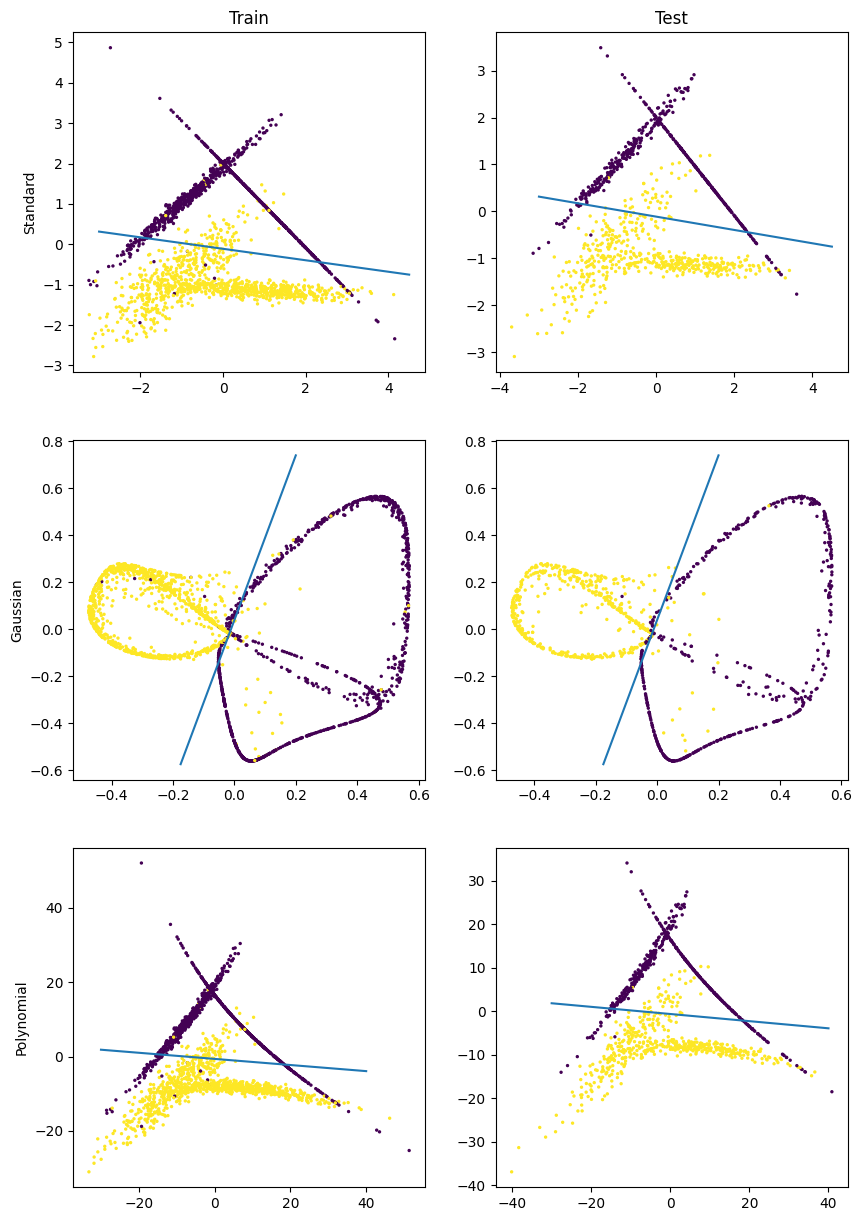

In [29]:
fig, ax = plt.subplots(3,2, figsize=(10,15))

# separator Xs
x = np.linspace(-3,4.5,1000).reshape(-1,1)
gauss_x = np.linspace(-0.175,0.2,1000).reshape(-1,1)
poly_x = np.linspace(-30,40,1000).reshape(-1,1)

ax[0,0].scatter(train_projection[:, 0], train_projection[:, 1], s=2, c=y_train)
ax[0,0].plot(x, -(w0/w1)*x - (b/w1))
ax[0,0].set_title('Train')
ax[0,0].set_ylabel('Standard')

ax[0,1].scatter(test_projection[:, 0], test_projection[:, 1], s=2, c=y_test)
ax[0,1].plot(x, -(w0/w1)*x - (b/w1))
ax[0,1].set_title('Test')


ax[1,0].scatter(train_gauss_projection[:, 0], train_gauss_projection[:, 1], s=2, c=y_train)
ax[1,0].plot(gauss_x, -(gauss_w0/gauss_w1)*gauss_x - (gauss_b/gauss_w1))
ax[1,0].set_ylabel('Gaussian')

ax[1,1].scatter(test_gauss_projection[:, 0], test_gauss_projection[:, 1], s=2, c=y_test)
ax[1,1].plot(gauss_x, -(gauss_w0/gauss_w1)*gauss_x - (gauss_b/gauss_w1))


ax[2,0].scatter(train_poly_projection[:, 0], train_poly_projection[:, 1], s=2, c=y_train)
ax[2,0].plot(poly_x, -(poly_w0/poly_w1)*poly_x - (poly_b/poly_w1))
ax[2,0].set_ylabel('Polynomial')

ax[2,1].scatter(test_poly_projection[:, 0], test_poly_projection[:, 1], s=2, c=y_test)
ax[2,1].plot(poly_x, -(poly_w0/poly_w1)*poly_x - (poly_b/poly_w1))

print(f'Accuracy: {accuracy}') 
print(f'Accuracy with gaussian kernel: {gauss_accuracy}')
print(f'Accuracy with polynomial kernel: {poly_accuracy}')